In [2]:
!pip install --upgrade diffusers transformers scipy

  Obtaining dependency information for diffusers from https://files.pythonhosted.org/packages/dc/92/b17949ff6b634bfb93e12ff8753288d6c59edf4366cc5c501377e6373e0c/diffusers-0.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/12/dd/f17b11a93a9ca27728e12512d167eb1281c151c4c6881d3ab59eb58f4127/transformers-4.35.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 9.2 MB/s eta 0:00:00
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/e0/9e/80e2205d138960a49caea391f3710600895dd8292b6868dc9aff7aa593f9/scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 7.4 MB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub>=0.19.4 from https://files.pythonhosted.org/packages/05/09/1945ca6ba3ad8ad6e2872ba682ce8d68c5e63c8e55458ed8ab4885709f1d/huggingface_

Download Stable diffusion model

In [3]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)
pipe.enable_attention_slicing()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Create a image hat

  0%|          | 0/50 [00:00<?, ?it/s]

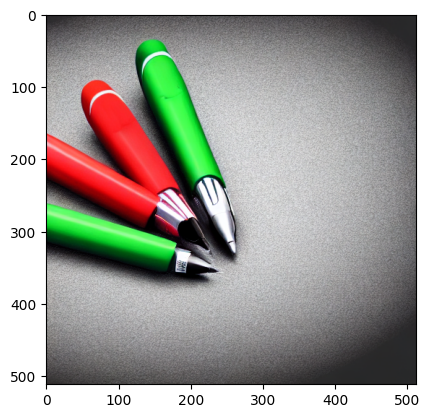

In [35]:
# Create a image
prompt = "single pen HD image with bright background"
himage = pipe(prompt).images[0]
plt.imshow(himage)
himage.save("image_1.png")

Creating another image bottle

  0%|          | 0/50 [00:00<?, ?it/s]

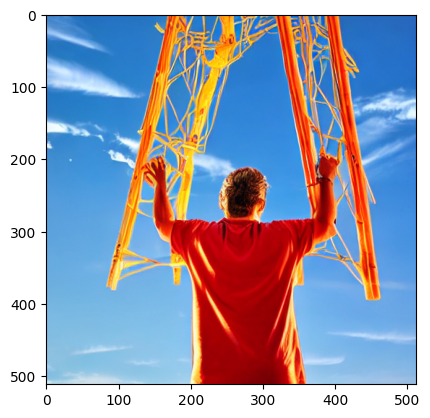

In [43]:
prompt = "human standing with bright background"
image = pipe(prompt).images[0]
plt.imshow(image)
image.save("image_2.png")

  0%|          | 0/50 [00:00<?, ?it/s]

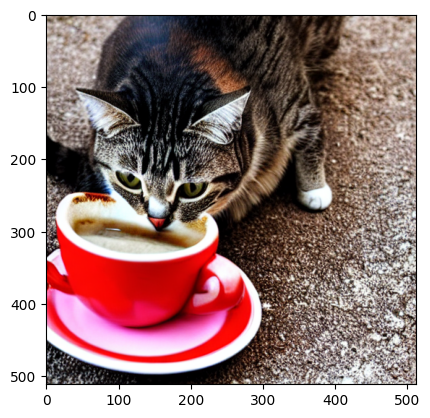

In [55]:
prompt = "Cat drinking coffee in daylight with bright background"
image3 = pipe(prompt).images[0]
plt.imshow(image3)
image.save("image_3.png")

Creating backgrounds for the images using SD

  0%|          | 0/50 [00:00<?, ?it/s]

NameError: name 'btimage' is not defined

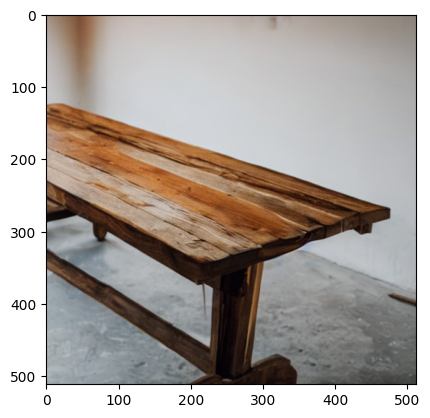

In [9]:
prompt = "a wooden table with bright background"
bgimage = pipe(prompt).images[0]
plt.imshow(bgimage)
btimage.save("background_image.png")

  0%|          | 0/50 [00:00<?, ?it/s]

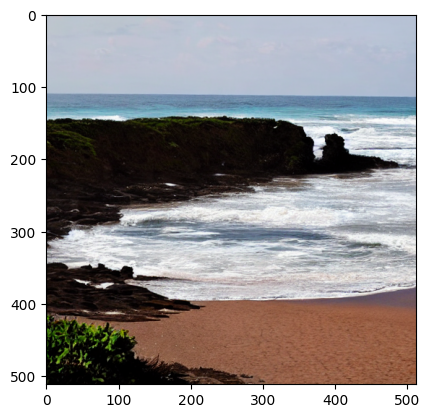

In [10]:
prompt = "a beach with ocean tides on noon"
bgimage2 = pipe(prompt).images[0]
plt.imshow(bgimage2)
bgimage.save("background_image2.png")

  0%|          | 0/50 [00:00<?, ?it/s]

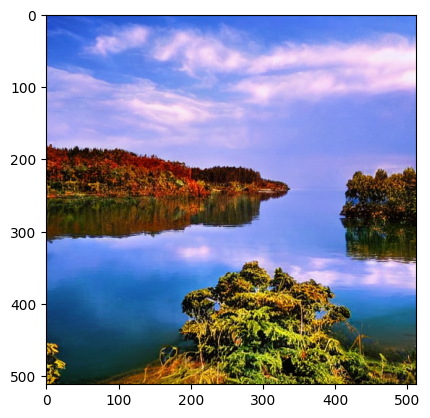

In [12]:
prompt = "Good natural scenery"
bgimage3 = pipe(prompt).images[0]
plt.imshow(bgimage3)
bgimage.save("background_image3.png")

In [13]:
print(type(image))
print(type(bgimage))

<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>


# Image Segmentation part

### SAM-ViT-Base

Segment Anything - Meta

In [14]:
from tensorflow import keras
from transformers import TFSamModel, SamProcessor
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config
from PIL import Image
import requests
import glob
import os

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [15]:
from PIL import Image
import requests
from transformers import SamModel, SamProcessor

model = SamModel.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/375M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [36]:
raw_image = himage
input_points = [[[450, 600]]] # 2D localization of a window

inputs = processor(raw_image, input_points=input_points, return_tensors="pt")#.to("cuda")
outputs = model(**inputs)
masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())
scores = outputs.iou_scores

We take first result map for merging with background

In [31]:
print(scores)

tensor([[[0.9505, 0.9487, 0.9320]]], grad_fn=<SliceBackward0>)


In [32]:
# Inverse helps in getting object instead of background from original image
def inverse(masks):
    test = tf.where(masks, 1, 0)
    whole = tf.ones_like(test)
    whole = whole-test
    res = tf.greater(whole,0)
    return res

def proper_bg(mask,bg_image):
    fig, ax = plt.subplots(1, 2, figsize=(8, 8))
    h, w = mask.shape[-2:]
    plain = np.zeros((h,w,3), np.uint8)
    reshaped_mask = mask.reshape(h, w, 1)
    remask_unaltered = mask.reshape(h, w)
    remask_unaltered = remask_unaltered.numpy()
    backim = np.array(bg_image)
    inv_mask = inverse(reshaped_mask)
    remask = inv_mask.reshape(h, w)
    remask = remask.numpy()
    resized_original = raw_image.resize((h,w))
    np_original = np.array(resized_original)
    tensor_original = tf.convert_to_tensor(resized_original)
    for x in range(remask.shape[0]):
        for y in range(remask.shape[1]):
            if remask[x][y]==False:
                plain[x][y] = backim[x][y]
            else:
                plain[x][y] = np_original[x][y]
    ax[0].imshow(np.asarray(plain),alpha=1.0)
    for x in range(remask_unaltered.shape[0]):
        for y in range(remask_unaltered.shape[1]):
            if remask_unaltered[x][y]==False:
                plain[x][y] = backim[x][y]
            else:
                plain[x][y] = np_original[x][y]
    ax[1].imshow(np.asarray(plain),alpha=1.0)

def show_masks_only(raw_image, masks, scores,bgimage):
    if len(masks[0].shape) == 4:
        final_masks = tf.squeeze(masks[0])
    if scores.shape[0] == 1:
        final_scores = tf.squeeze(scores)

    nb_predictions = scores.shape[-1]
    print("nb_predictions ",nb_predictions)
    nb_predictions = 1

    for i, (mask, score) in enumerate(zip(final_masks, final_scores)):
        proper_bg(mask, bgimage)
        break
    plt.show()

nb_predictions  3


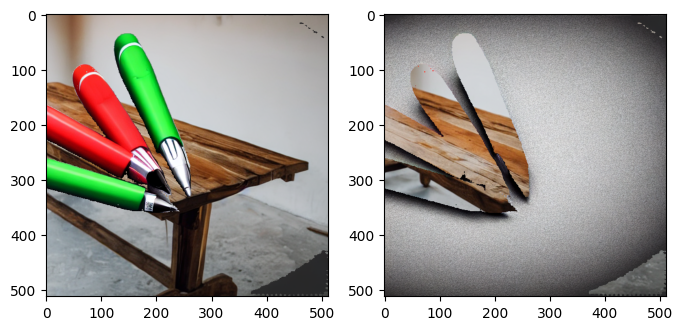

In [37]:
show_masks_only(raw_image, masks, outputs.iou_scores.detach().numpy(),bgimage)

nb_predictions  3


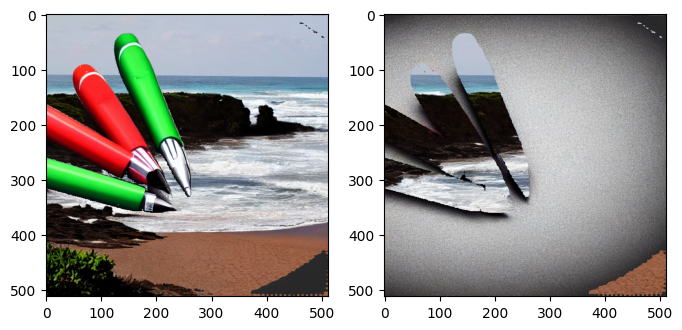

In [39]:
show_masks_only(raw_image, masks, outputs.iou_scores.detach().numpy(),bgimage2)

nb_predictions  3


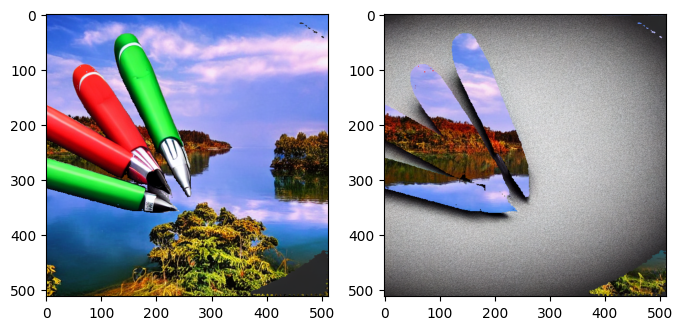

In [40]:
show_masks_only(raw_image, masks, outputs.iou_scores.detach().numpy(),bgimage3)

In [44]:
raw_image = image
input_points = [[[450, 600]]] # 2D localization of a window

inputs = processor(raw_image, input_points=input_points, return_tensors="pt")#.to("cuda")
outputs = model(**inputs)
masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())
scores = outputs.iou_scores

nb_predictions  3


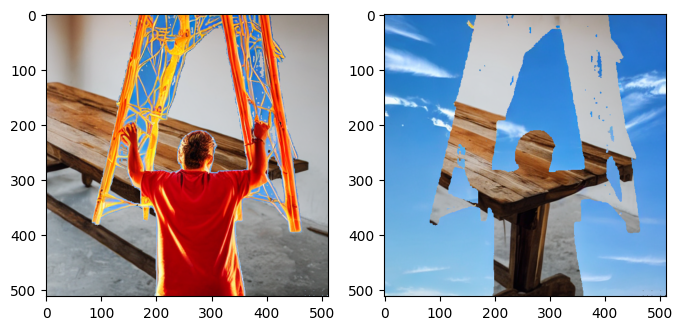

In [45]:
show_masks_only(raw_image, masks, outputs.iou_scores.detach().numpy(),bgimage)

nb_predictions  3


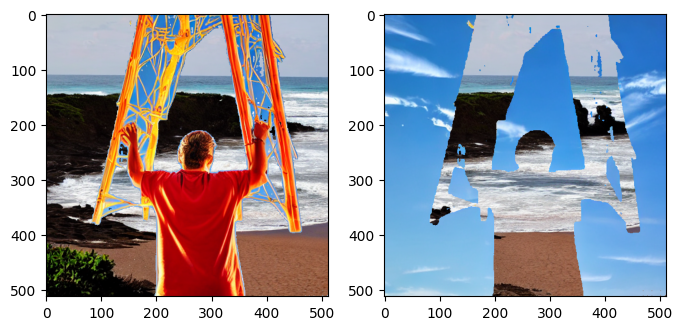

In [46]:
show_masks_only(raw_image, masks, outputs.iou_scores.detach().numpy(),bgimage2)

nb_predictions  3


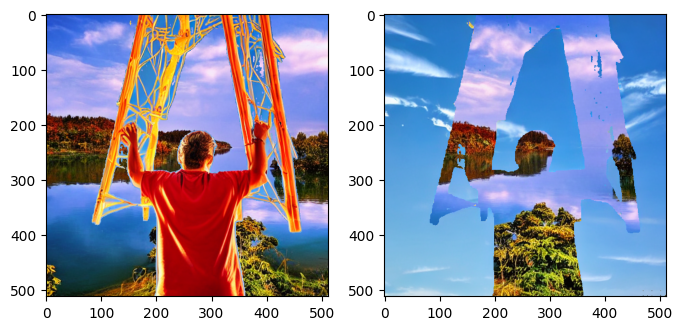

In [47]:
show_masks_only(raw_image, masks, outputs.iou_scores.detach().numpy(),bgimage3)

In [56]:
raw_image = image3
input_points = [[[450, 600]]] # 2D localization of a window

inputs = processor(raw_image, input_points=input_points, return_tensors="pt")#.to("cuda")
outputs = model(**inputs)
masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())
scores = outputs.iou_scores

nb_predictions  3


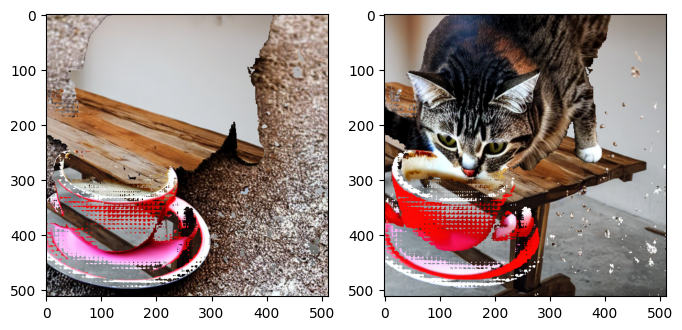

In [57]:
show_masks_only(raw_image, masks, outputs.iou_scores.detach().numpy(),bgimage)

nb_predictions  3


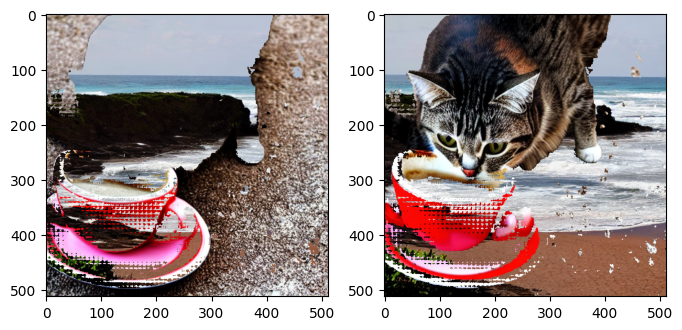

In [58]:
show_masks_only(raw_image, masks, outputs.iou_scores.detach().numpy(),bgimage2)

nb_predictions  3


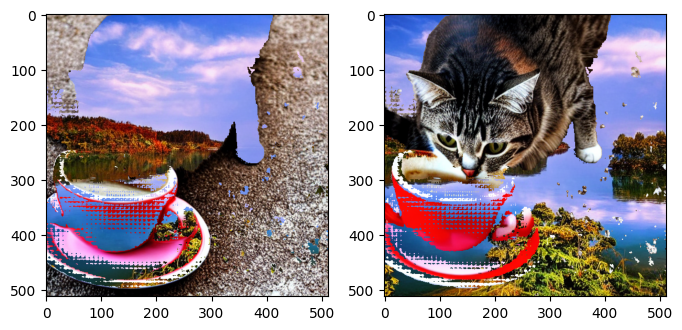

In [59]:
show_masks_only(raw_image, masks, outputs.iou_scores.detach().numpy(),bgimage3)